# Concrete Strength Prediction

# Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

In [1]:
#import key libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [2]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

# Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
Name -- Data Type -- Measurement -- Description
#Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
#Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
#Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
#Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
#Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
#Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
#Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
#Age(age) -- quantitative -- Day (1~365) -- Input Variable
#Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [3]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_csv("concrete.csv")

In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.shape

(1030, 9)

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [9]:
# Ash, slag and superplastic has zero values, which might indicate some sknewness in data

In [10]:
df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

In [11]:
#but the distribution is not lookng as much skewed.

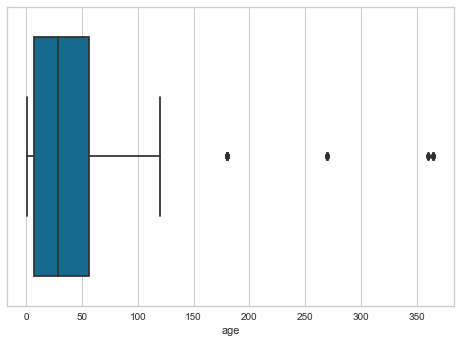

In [12]:
sns.boxplot(df['age'])
plt.show()

In [13]:
#age has some major outliers 

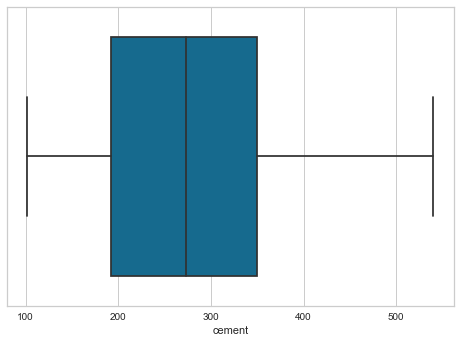

In [14]:
sns.boxplot(df['cement'])
plt.show()

In [15]:
#cement data looks more evenly distributed

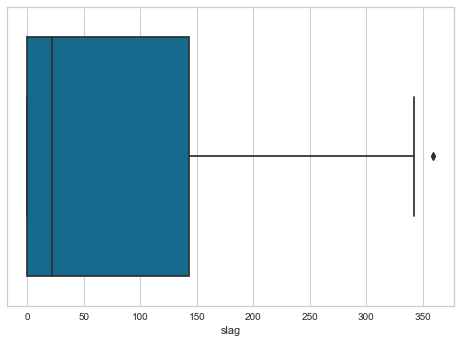

In [16]:
sns.boxplot(df['slag'])
plt.show()

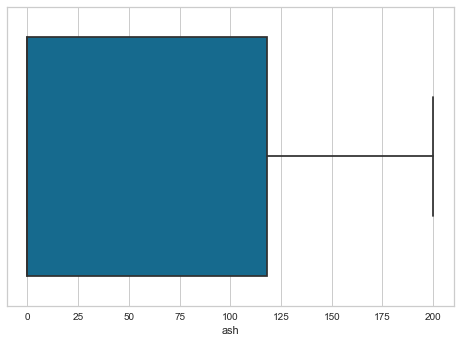

In [17]:
sns.boxplot(df['ash'])
plt.show()

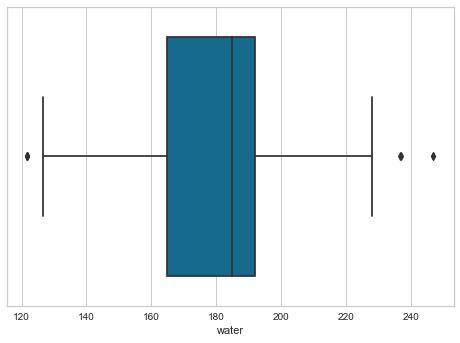

In [18]:
sns.boxplot(df['water'])
plt.show()

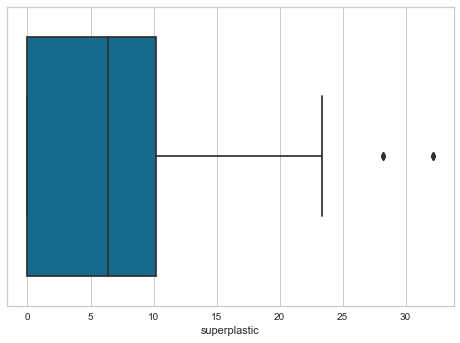

In [19]:
sns.boxplot(df['superplastic'])
plt.show()

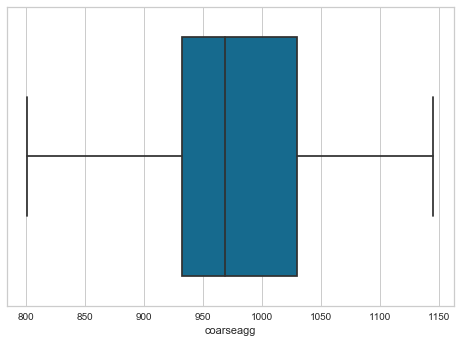

In [20]:
sns.boxplot(df['coarseagg'])
plt.show()

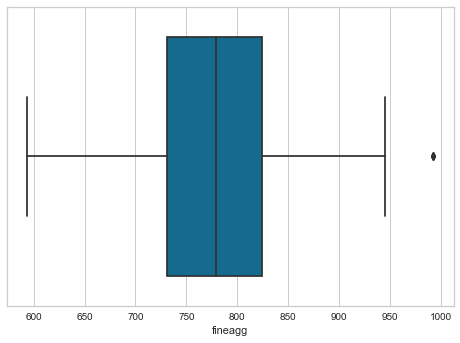

In [21]:
sns.boxplot(df['fineagg'])
plt.show()

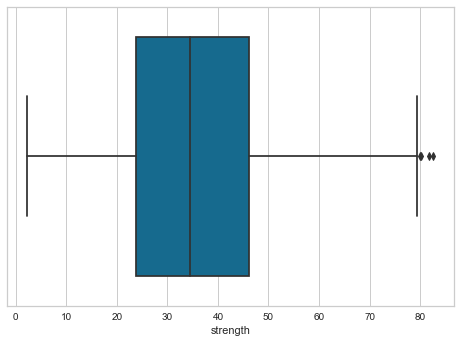

In [22]:
sns.boxplot(df['strength'])
plt.show()

In [23]:
#from the above analysis it is evident that there is some skewness in the super plast data but the other variable and the target varible looks very stable.

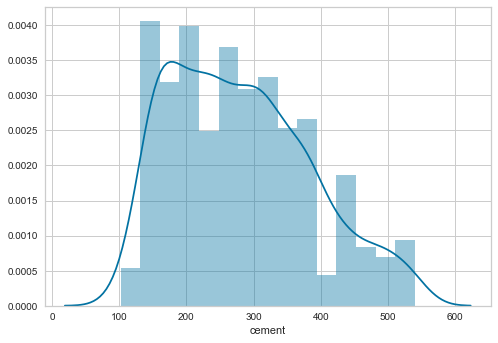

In [24]:
sns.distplot(df['cement'])
plt.show()

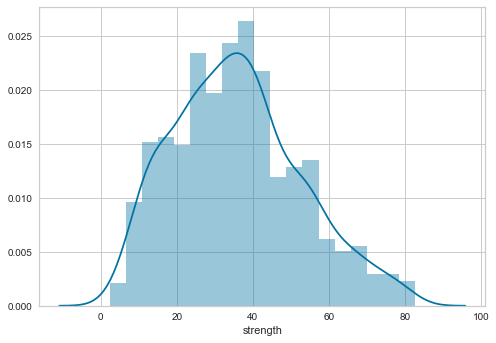

In [25]:
sns.distplot(df['strength'])
plt.show()

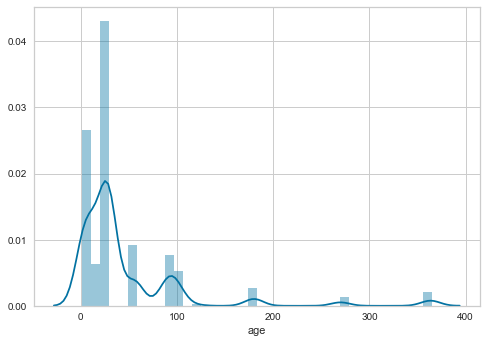

In [26]:
sns.distplot(df['age'])
plt.show()

In [27]:
#age has a long tail

In [28]:
df[df['slag']==0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65
12,385.00,0.00,0.00,186.00,0.00,966.00,763.00,14,27.92
...,...,...,...,...,...,...,...,...,...
1022,144.80,0.00,133.60,180.80,11.10,979.50,811.50,28,13.20
1024,297.20,0.00,117.50,174.80,9.50,"1,022.80",753.50,3,21.91
1025,135.00,0.00,166.00,180.00,10.00,961.00,805.00,28,13.29
1026,531.30,0.00,0.00,141.80,28.20,852.10,893.70,3,41.30


In [29]:
df[df['ash']==0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75
...,...,...,...,...,...,...,...,...,...
1021,203.50,305.30,0.00,203.50,0.00,963.40,630.00,3,9.56
1023,141.30,212.00,0.00,203.50,0.00,971.80,748.50,7,10.39
1026,531.30,0.00,0.00,141.80,28.20,852.10,893.70,3,41.30
1028,342.00,38.00,0.00,228.00,0.00,932.00,670.00,270,55.06


In [30]:
# there are many zero values in the ash and slag columns and this will require further analysis to understand if there can be slack and ash with 0 values.

In [31]:
#are there any NULL values in the data
df.isnull().values.any()

False

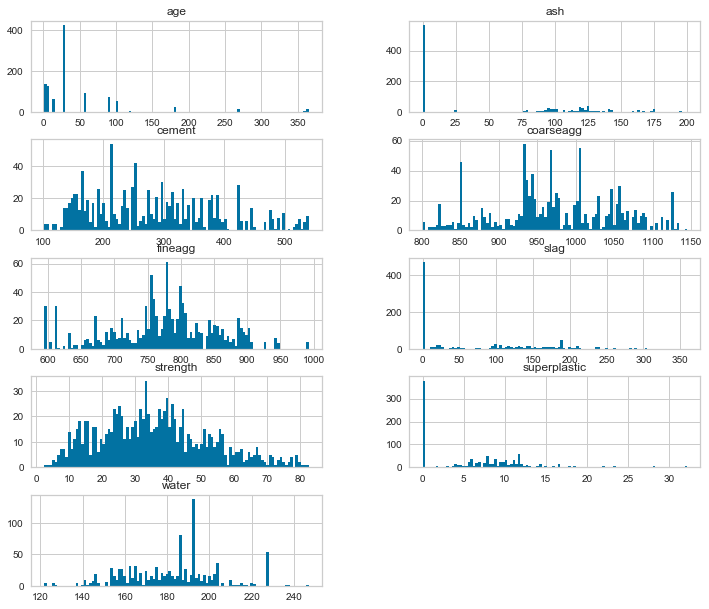

In [32]:
columns = list(df)
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [33]:
# 2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves.

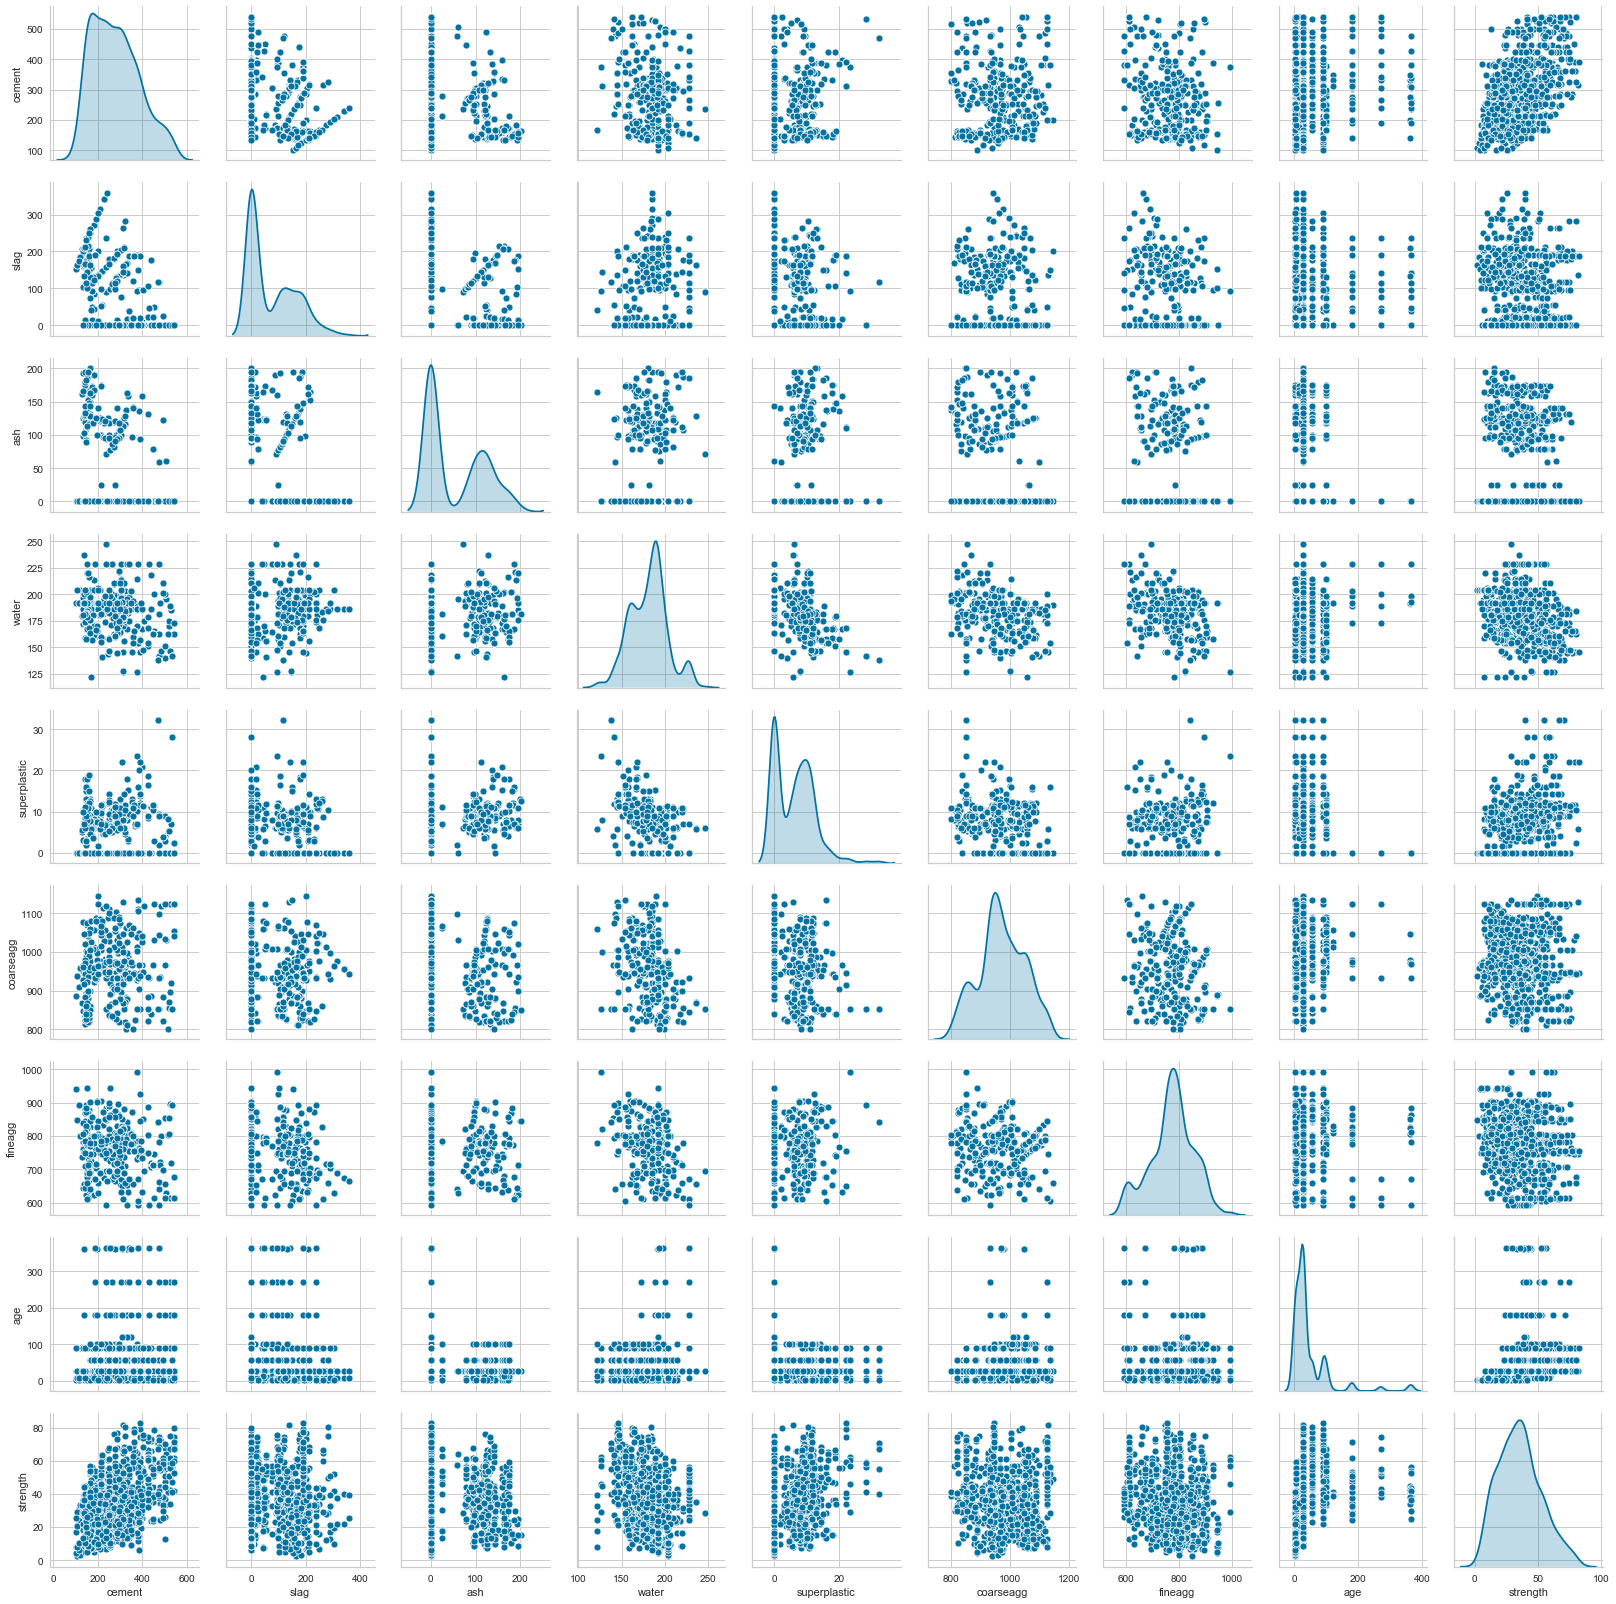

In [34]:
sns.pairplot(df, diag_kind= 'kde')
plt.show()

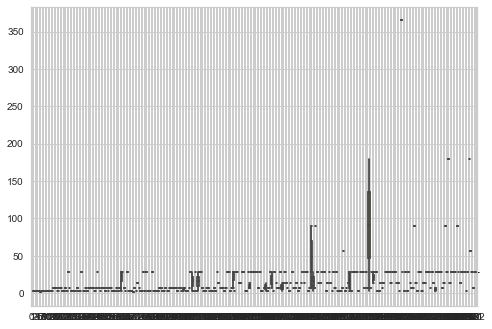

In [35]:
for i in ['age','cement']:
    sns.boxplot(x='strength',y=i,data=df)
    plt.show()

In [36]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


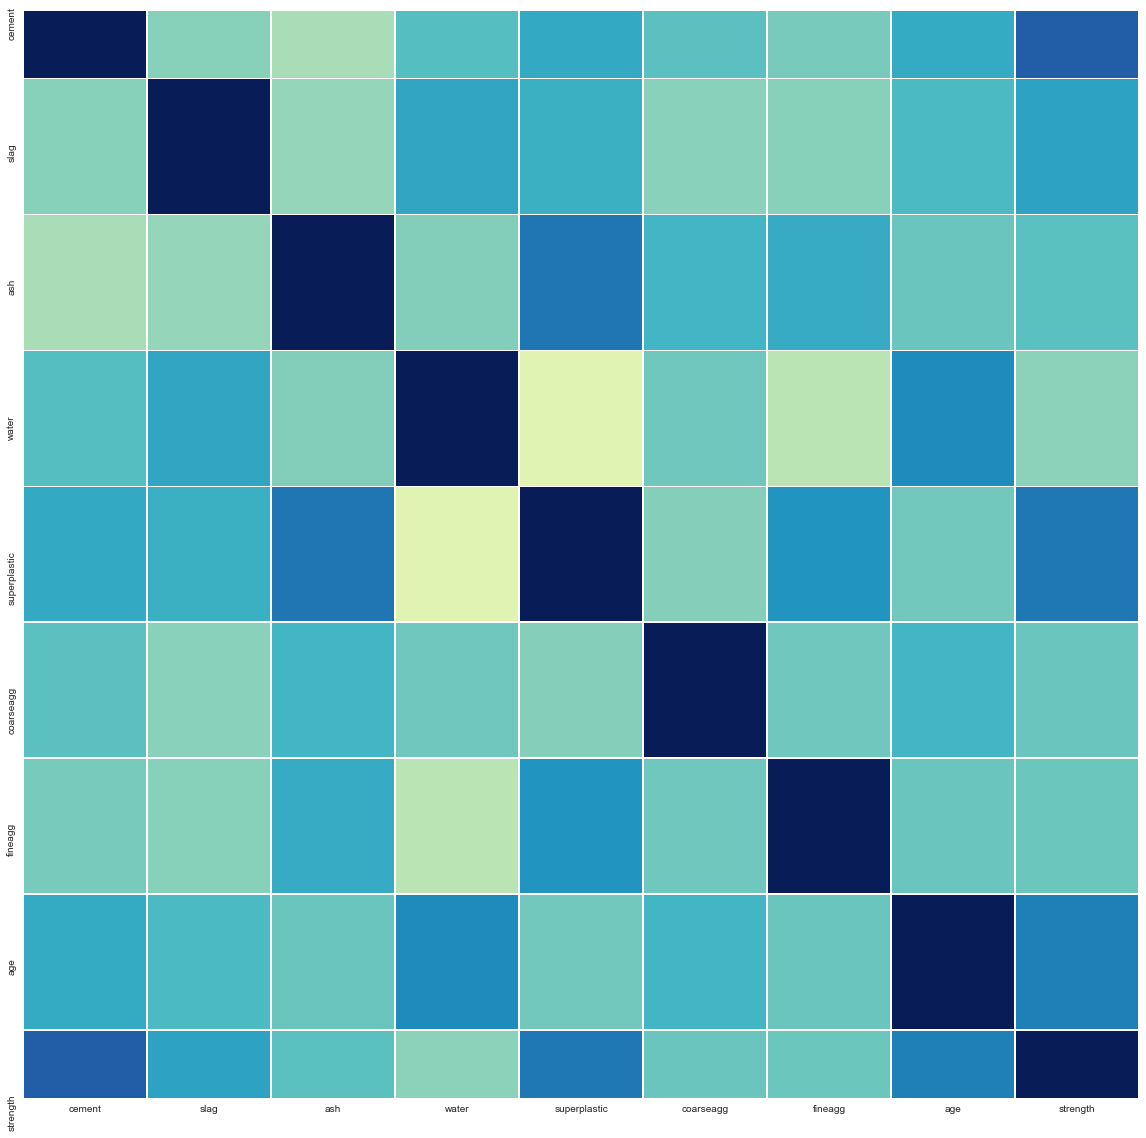

In [37]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [38]:
# from the analysis above the strongest predictors of the strength appear to be Cement, Superplastic, Age and Slag.

In [39]:
#3. Feature Engineering techniques (10 marks)
#a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
#b. Get data model ready and do a train test split.
#c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

In [40]:
# To identify and extract new features from existing features, one requires a deeper understanding of the subject. Unfortunately I did not get a chance to research it properly

In [41]:
df=df.round(0).astype(int)

In [42]:
X = df.drop(columns= 'strength')
y = df.strength


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Train R^2
print(regression_model.score(X_train, y_train))

0.6089826044897847


In [50]:
# Test R^2
print(regression_model.score(X_test, y_test))

0.6303878831765857


In [51]:
# a simple linear model will not suitable fo this analysis, due to the complexity of data and a lack of strong correlation with different input parameters


# Creating the model and tuning it
1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.

In [52]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
#PCA - to reduce dimensions
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=3)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.034


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 


param_grid = {'pca__n_components':[4,5],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

In [ ]:
# looking at the regression model result, it appear the linear regression model is providing the better outcome

In [59]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()

In [61]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [64]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [65]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
gs.best_params_

{'algorithm': 'brute', 'n_neighbors': 1}

In [67]:
gs.cv_results_['mean_test_score']

array([0.19170984, 0.13341969, 0.08549223, 0.07253886, 0.06476684,
       0.05958549, 0.05958549, 0.06476684, 0.19170984, 0.13341969,
       0.08549223, 0.07124352, 0.06476684, 0.05958549, 0.05958549,
       0.06476684, 0.19170984, 0.13341969, 0.08549223, 0.07253886,
       0.06476684, 0.05958549, 0.05958549, 0.06476684, 0.19430052,
       0.12953368, 0.08678756, 0.06994819, 0.06606218, 0.05958549,
       0.05958549, 0.06476684])

In [ ]:
#2. Techniques employed to squeeze that extra performance out of the model without making it over fit. 
#Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.